In [169]:
#Import packages
import sympy as sp
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

In [170]:

#All the variable names are self-explanatory except for x and y. Take x as the contribution of individual i when they are poor and y when they are rich.
gl, gh, wh, wl, sigma, n, fhigh, flow, alpha, beta, gamma, cl, ch, x, y, theta = sp.symbols('g_{l} g_{h} w_{h} w_{l} sigma n f(w_{h}) f(w_{l}) alpha beta gamma cl ch x y theta')

In [171]:
#Define Public Good and Utility functions

G = (sigma*((n*flow-1)*gl+x+(n*fhigh-1)*gh+y)/(theta*n*flow))
Gl = G.subs({y:gh})
Gh = G.subs({x:gl})

Ul = (wl-x)**(1-gamma) + (Gl)**(1-gamma) + alpha*(n*flow-1)*((wl-gl)**(1-gamma) + (Gl)**(1-gamma)) + beta*n*fhigh*(wh-gh)**(1-gamma)
Uh = (wh-y)**(1-gamma) + alpha*(n*fhigh-1)*((wh-gh)**(1-gamma)) + beta*n*flow*((wl-gl)**(1-gamma) + (Gh)**(1-gamma))

#Define other variables of interest
G = (sigma*((n*flow)*gl+(n*fhigh)*gh)/(theta*n*flow))
g = G/(n*flow*wl+n*fhigh*wh)

#Define inequality index
def gini_index(x_high, x_low, f_high, f_low):
    # Calculate mean income
    mean_x = f_high * x_high + f_low * x_low
    
    # Calculate the Gini coefficient
    gini = (f_high * f_low * abs(x_high - x_low)) / mean_x
    
    return gini

In [172]:
#Define the BR functions calculated by hand

myghBR = (wh - (beta*sigma/theta)**(-1/gamma)*(sigma*gl/theta))/(1+(beta*sigma/theta)**(-1/gamma)*(sigma*fhigh/(flow*theta)))
myglBR = (wl-((sigma*(1+alpha*(n*flow-1)))/(n*flow*theta))**(-1/gamma)*(sigma*gh*fhigh/(theta*flow)))/(1+((sigma*(1+alpha*(n*flow-1)))/(n*flow*theta))**(-1/gamma)*(sigma/theta))

print(sp.latex(sp.simplify(myghBR)))
print(sp.latex(sp.simplify(myglBR)))

display(sp.simplify(myghBR), sp.simplify(myglBR))

\frac{f(w_{l}) \left(- g_{l} \sigma + \theta w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}\right)}{f(w_{h}) \sigma + f(w_{l}) \theta \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}}
\frac{- f(w_{h}) g_{h} \sigma + f(w_{l}) \theta w_{l} \left(\frac{\sigma \left(\alpha \left(f(w_{l}) n - 1\right) + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}}}{f(w_{l}) \left(\sigma + \theta \left(\frac{\sigma \left(\alpha \left(f(w_{l}) n - 1\right) + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}}\right)}


f(w_{l})*(-g_{l}*sigma + theta*w_{h}*(beta*sigma/theta)**(1/gamma))/(f(w_{h})*sigma + f(w_{l})*theta*(beta*sigma/theta)**(1/gamma))

(-f(w_{h})*g_{h}*sigma + f(w_{l})*theta*w_{l}*(sigma*(alpha*(f(w_{l})*n - 1) + 1)/(f(w_{l})*n*theta))**(1/gamma))/(f(w_{l})*(sigma + theta*(sigma*(alpha*(f(w_{l})*n - 1) + 1)/(f(w_{l})*n*theta))**(1/gamma)))

In [173]:
#Calculate interior solutions
myglsol = list(sp.solveset(sp.Eq(myglBR.subs({gh:myghBR}),gl), gl))[0]
print(sp.latex(sp.simplify(myglsol)))

myghsol = myghBR.subs({gl:myglsol})
print(sp.latex(sp.simplify(myghsol)))

display(sp.simplify(myghsol), sp.simplify(myglsol))

\frac{- f(w_{h}) \sigma w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} + f(w_{h}) \sigma w_{l} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}} + f(w_{l}) \theta w_{l} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}}}{f(w_{h}) \sigma \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}} + f(w_{l}) \sigma \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} + f(w_{l}) \theta \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}}}
\frac{f(w_{l}) \left(\sigma w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} - \sigma w_{l} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\

f(w_{l})*(sigma*w_{h}*(beta*sigma/theta)**(1/gamma) - sigma*w_{l}*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma) + theta*w_{h}*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma))/(f(w_{h})*sigma*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma) + f(w_{l})*sigma*(beta*sigma/theta)**(1/gamma) + f(w_{l})*theta*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma))

(-f(w_{h})*sigma*w_{h}*(beta*sigma/theta)**(1/gamma) + f(w_{h})*sigma*w_{l}*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma) + f(w_{l})*theta*w_{l}*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma))/(f(w_{h})*sigma*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma) + f(w_{l})*sigma*(beta*sigma/theta)**(1/gamma) + f(w_{l})*theta*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma))

In [174]:
#Calculate G for interior solutions
Gsol = sp.simplify(G.subs({gl: myglsol, gh: myghsol}))

print(sp.latex(Gsol))

display(Gsol)

\frac{\sigma \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}} \left(f(w_{h}) w_{h} + f(w_{l}) w_{l}\right)}{f(w_{h}) \sigma \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}} + f(w_{l}) \sigma \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} + f(w_{l}) \theta \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}} \left(\frac{\sigma \left(\alpha f(w_{l}) n - \alpha + 1\right)}{f(w_{l}) n \theta}\right)^{\frac{1}{\gamma}}}


sigma*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma)*(f(w_{h})*w_{h} + f(w_{l})*w_{l})/(f(w_{h})*sigma*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma) + f(w_{l})*sigma*(beta*sigma/theta)**(1/gamma) + f(w_{l})*theta*(beta*sigma/theta)**(1/gamma)*(sigma*(alpha*f(w_{l})*n - alpha + 1)/(f(w_{l})*n*theta))**(1/gamma))

In [175]:
#4.2 Proof of Warr's neutrality result (Appendix B.1.)
whprime, wlprime = sp.symbols('w_{h}^{\prime} w_{l}^{\prime}')
whprime = wh - (wlprime - wl) *flow/fhigh
Gprime = G.subs({wh:whprime, wl:wlprime})
Gstar = G.subs({wh:wh, wl:wl})
sp.simplify(Gprime - Gstar)

0

In [176]:
#4.2 This finds the threshold n for the interior solution to exist for each type
nthgl = sp.solve(sp.Eq(myglsol,0), n)[0]
print(sp.latex(sp.simplify(nthgl)))

nthgh = sp.solve(sp.Eq(myghsol, 0), n)[0]
print(sp.latex(sp.simplify(nthgh)))

#An example
display(nthgl.subs({gamma:0.5, sigma:0.9, flow:0.6, fhigh:0.4, wh:950, wl:90, alpha: 0.5, beta: 0.2, theta: 0.8}))
display(nthgh.subs({gamma:0.5, sigma:0.9, flow:0.6, fhigh:0.4, wh:950, wl:90, alpha: 0.5, beta: 0.2, theta: 0.8}))


\frac{\sigma \left(\alpha - 1\right)}{f(w_{l}) \left(\alpha \sigma - \theta \left(\frac{f(w_{h}) \sigma w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}}{w_{l} \left(f(w_{h}) \sigma + f(w_{l}) \theta \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}\right)}\right)^{\gamma}\right)}
\frac{\sigma \left(\alpha - 1\right)}{f(w_{l}) \left(\alpha \sigma - \theta \left(\frac{\sigma w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}}{\sigma w_{l} - \theta w_{h} \left(\frac{\beta \sigma}{\theta}\right)^{\frac{1}{\gamma}}}\right)^{\gamma}\right)}


6.46459628124106

2.10018586079480

In [178]:
#Plotting time. This is df used for most of the graphs. The calibrations are discussed in the paper.

data = []
wh_value = 120
wl_value = 100
n_value = 2
sigma_value = 0.4
flow_value = 0.6
fhigh_value = 1-flow_value
alpha_value = 0.6
beta_value = 0.3
gamma_value = 0.5
theta_value = 0.5
Wealth_value = wl_value*flow_value*n_value + wh_value*fhigh_value*n_value

while flow_value <= 0.9:
    wh_value = 120
    wl_value = 100
    while wh_value < 1000:
        n_value = 2
        while n_value < 51:
            if myglsol.subs({wh:wh_value, wl: wl_value, sigma: sigma_value, n: n_value, fhigh: fhigh_value, flow: flow_value, alpha: alpha_value, beta: beta_value, gamma: gamma_value, theta: theta_value}) < 0:
                glvalue = 0
                ghvalue = myghBR.subs({wh: wh_value, wl: wl_value, sigma: sigma_value, n: n_value, fhigh: fhigh_value, flow: flow_value, alpha: alpha_value, beta: beta_value, gamma: gamma_value, gl: glvalue, theta: theta_value})
            else:
                glvalue = myglsol.subs({wh: wh_value, wl: wl_value, sigma: sigma_value, n: n_value, fhigh: fhigh_value, flow: flow_value, alpha: alpha_value, beta: beta_value, gamma: gamma_value, theta: theta_value})
                ghvalue = myghsol.subs({wh: wh_value, wl: wl_value, sigma: sigma_value, n: n_value, fhigh: fhigh_value, flow: flow_value, alpha: alpha_value, beta: beta_value, gamma: gamma_value, gl: glvalue, theta: theta_value})
                if ghvalue < 0:
                    ghvalue = 0
                    glvalue = myglBR.subs({wh: wh_value, wl: wl_value, sigma: sigma_value, n: n_value, fhigh: fhigh_value, flow: flow_value, alpha: alpha_value, beta: beta_value, gamma: gamma_value, gh: ghvalue, theta: theta_value})
                else:
                    ghvalue = ghvalue
            ineq = gini_index(wh_value, wl_value, fhigh_value, flow_value)
            data.append({'fl': flow_value, 'n': n_value, 'gl': glvalue, 'gh': ghvalue, 'wh':wh_value, 'wl':wl_value, 'Inequality':ineq})
            n_value = n_value + 1
        wh_value = wh_value + 10
        wl_value = wl_value-(wh_value-(wh_value-10))*fhigh_value/flow_value
    flow_value = flow_value + 0.1
    fhigh_value = 1-flow_value

df = pd.DataFrame(data)
df['G'] = df.apply(lambda row: G.subs({gl: row['gl'], gh: row['gh'], wl: row['wl'], wh: row['wh'], sigma: sigma_value, n: row['n'], fhigh: 1-row['fl'], flow: row['fl'], alpha: alpha_value, beta: beta_value, gamma: gamma_value, theta: theta_value}).evalf(), axis=1)
df1 = df[(df['wl'] > 0)&(df['fl'] < 0.95)]
df1['fl'] = df1['fl'].round(1)
df1

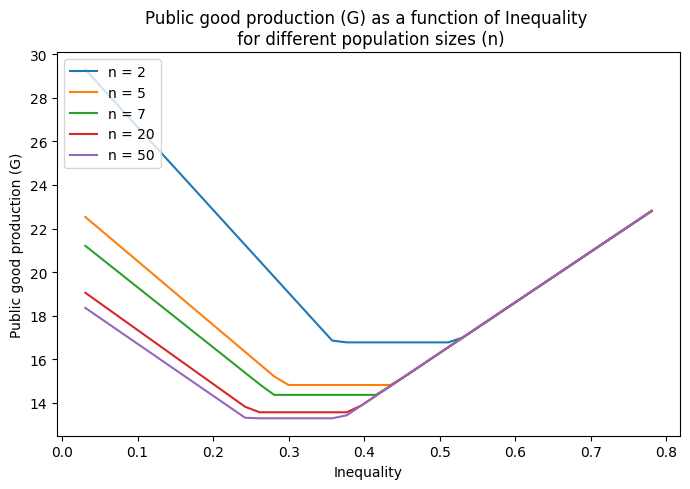

In [182]:
#Plotting Figure1

# Select five distinct values of n
n_values = [2, 5, 7, 20, 50]

# Create a figure and a single subplot
fig, ax1 = plt.subplots(figsize=(7, 5))  # Adjust the size as needed

for n_value in n_values:
    # Filter df1 for the current value of n and fl=0.8
    df_filtered = df1[(df1['n'] == n_value) & (df1['fl'] == 0.8) & (df1['Inequality'] > 0)]
    
    # Sort df_filtered by 'Inequality' to ensure the line plot is ordered
    df_filtered = df_filtered.sort_values(by='Inequality')
    
    # Plot G vs Inequality as a line plot on the y-axis
    ax1.plot(df_filtered['Inequality'], df_filtered['G'], label=f'n = {n_value}')

ax1.set_xlabel('Inequality')
ax1.set_ylabel('Public good production (G)')

ax1.set_title('Public good production (G) as a function of Inequality \n for different population sizes (n)')

# Add legend
ax1.legend(loc='upper left')

plt.tight_layout()

# Save the figure
#plt.savefig('Figure1.png', dpi=300)
plt.show()

OSError: [Errno 30] Read-only file system: 'FigureA1.png'

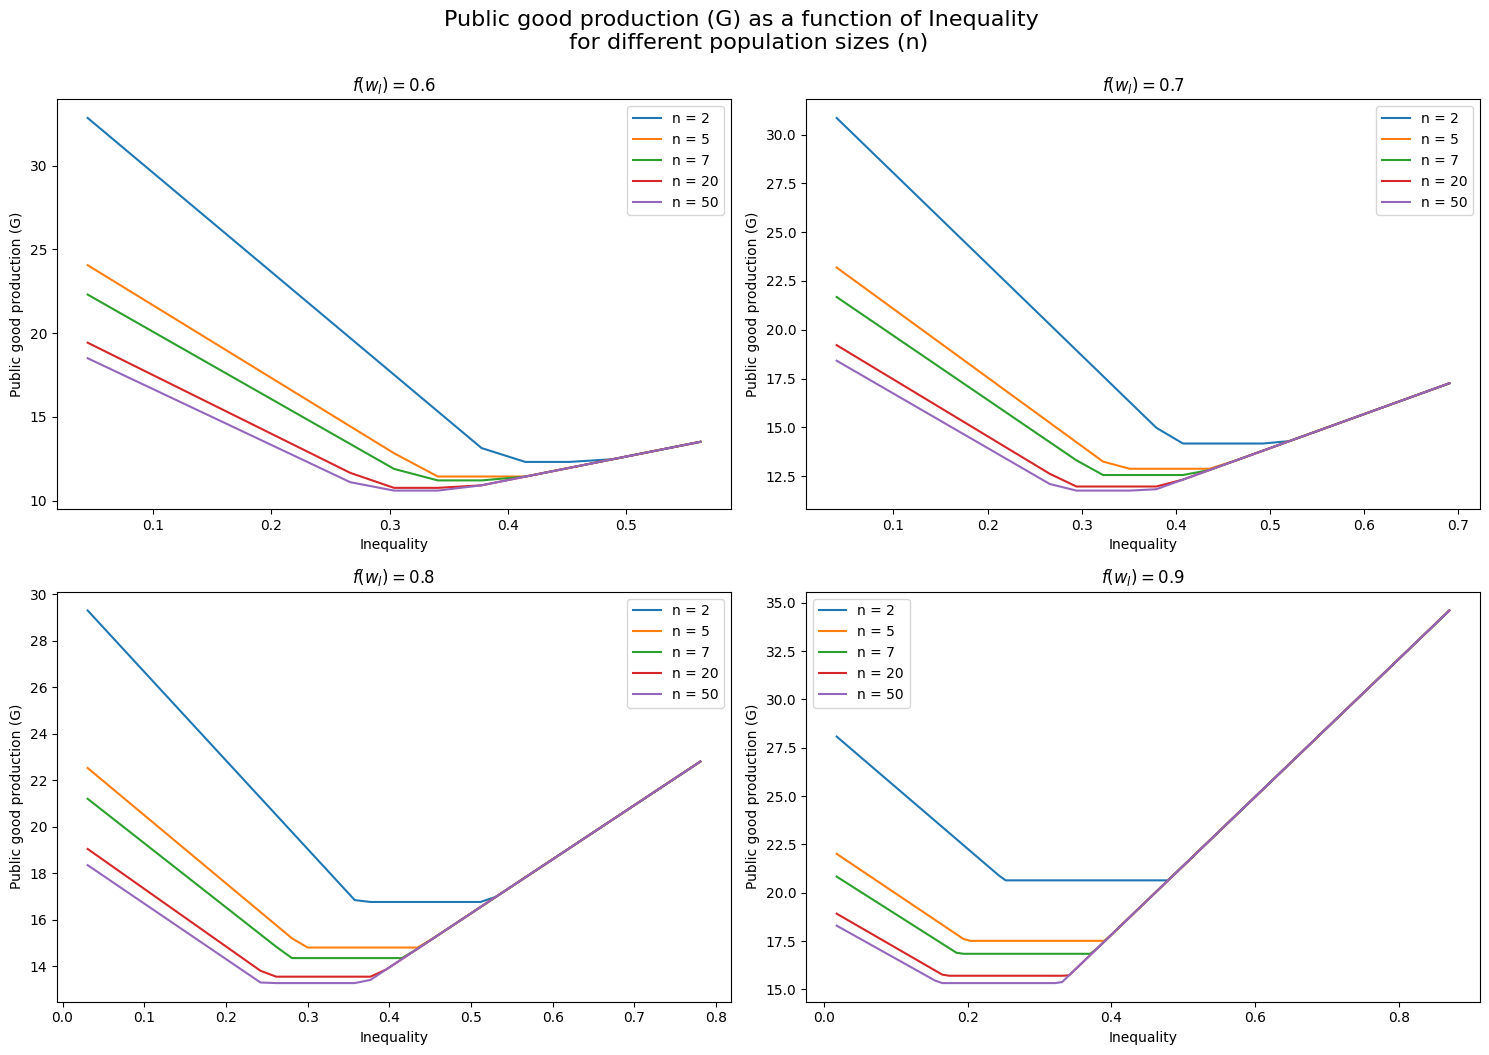

In [183]:
#Plotting FigureA1, for different fl

# Select five distinct values of n
n_values = [2, 5, 7, 20, 50]
fl_values = [0.6, 0.7, 0.8, 0.9]

# Create a figure and a single subplot
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 10))  # Adjust the size as needed
axs = axs.flatten()  # Flatten the array to make iteration easier

for i, fl_value in enumerate(fl_values):
    ax = axs[i]
    
    for n_value in n_values:
        # Filter df1 for the current value of n and the current fl value
        df_filtered = df1[(df1['n'] == n_value) & (df1['fl'] == fl_value)]
        
        # Sort df_filtered by 'Inequality' to ensure the line plot is ordered
        df_filtered = df_filtered.sort_values(by='Inequality')
        
        # Plot G vs Inequality as a line plot on the y-axis
        ax.plot(df_filtered['Inequality'], df_filtered['G'], label=f'n = {n_value}')
    
    ax.set_xlabel('Inequality')
    ax.set_ylabel('Public good production (G)')
    ax.set_title(f'$f(w_{{l}}) = {fl_value}$')
    ax.legend(loc='best')

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a title to the whole figure
fig.suptitle('Public good production (G) as a function of Inequality \n for different population sizes (n)', fontsize=16, y=1.05)

plt.savefig('FigureA1.png', dpi=300, bbox_inches='tight')
# Show the figure
plt.show()
